## <div align="center">Visualization of XPS data</div><hr></hr>
<b><div align="center">Rucha S. Railkar</b></div>
<div align="center">MS in Chemical Engineering, CIT, Carnegie Mellon University</div>

#### <div align="center">rrailkar@andrew.cmu.edu</div>

<b>Abstract</b>

X-ray Photoemission Spectroscopy (XPS) data for a metal alloy catalyst is collected by the Gellman Research group at Carnegie Mellon University. The goal of this data science project is to <u>visualize the collected data</u> efficiently enough, so as to use it for further analysis.
With this idea, a python script has been written using different libraries such as `numpy` and `plotly`, to read any given XPS data from a Microsoft excel file and be able to visualize it in the form of <u>interactive plots</u>. 

<b>Table of Contents</b>

1. [Introduction](#Introduction)
 - Introduction to XPS
 - Understanding the data
 - Project Goals
2. [Methods](#Methods)
 - Import Libraries
 - Downloading the raw data
 - Understanding form of data
 - Loading data into usable datatypes
 - Implementation of visualization  techniques
3. [Results](#Results)
 - Plot of the alloy grid, saving it offline
 - Plot of the XPS Spectrum, saving it offline
 - User input plot for XPS Spectrum
4. [Discussion](#Discussion)
5. [Extension](#Extension)
6. [Acknowledgements](#Acknowledgements)
7. [References](#References)

#### <u>Introduction</u>
Analysis of surfaces is a very important aspect in 'Catalysis and Surface science'. Compositional analysis is required to determine the coverages of the adsorped spcies. This in turn can be used to determine the rate of processes, types of reactions occuring on the surface and also to know the characteristics of the surface. 
One of the commonly used experimental techniques of analyzing surfaces is X-ray Photoemission Spectroscopy(XPS). 

- What does XPS exactly do?
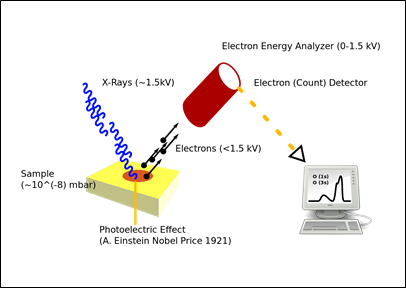
<div align='center'> Ref: https://en.wikipedia.org/wiki/File:XPS_CC_Roland_Siegbert.svg </div>

    In an XPS experiment, an X-ray of a sufficient energy is bombarded on the sample surface to break the photoelectron away from the nuclear attraction force of an element. This energy required to eject the electron is the characteristic Binding Energy for an element. Thus, an element can be identified with the help of its unique binding energy. 
  
  
- Experiment performed! What data did we get?
    
    XPS gives the data in the form of spectra. These spectra are displayed as a plot of the number of electrons vs. electron binding energy. This plot is commonly known as 'Counts (number of electrons) vs. Binding Energy' plot. These spectra have peaks which indicate specific elements. These peaks are not perfectly smooth. The 'noise' in the spectrum is the consequence of the collection of single electrons as counts which are randomly spaced in time.

Prof. Andrew Gellman's research group performs such XPS experiments and receives data. This data is then used for visualization and analysis to find the surface compositions of metal alloys. Such alloys are a special type, known as Composition Spread Alloy Film (CSAF). Here, the a thin film of the desired alloy composition is placed upon a substrate metal. 

The alloy catalyst data used for this project comes from a PdNiAu CSAF, on a 13x13 square grid. This XPS data consist of the following information:
1. X and Y co-ordinates of the alloy grid
2. Binding Energies vs. Counts data for each such (X,Y) co-ordinate.

Thus we can see a spectrum at each (X,Y) co-ordinate. These spectra indicate the component present at that position in the alloy grid.

<u>Project Goals</u>
1. Reading the data from the Excel file into a Jupyter notebook
2. Visualizing this data in the form of interactive plots, which can be easily understood by anyone trying to get a gist of the data
3. Saving this interactive plot using `plotly`, as an html file, which could be viewed on any browser, without a Jupyter notebbook or any python code

#### <u>Methods</u>

- Importing Libraries
    
    Python has several libraries which are collections of functions. These help us in performing many tasks easily. For this project, I have imported `numpy`, to use data in the form of arrays and alter them as needed,  `matplotlib` to plot for preliminary visualization and `plotly` to make interactive widgets and save the plots.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#To open excel workbook
from openpyxl import load_workbook

#For interactive plots
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets

- Downloading raw data

  The raw data file is an excel workbook, you can download the file from the link below:
    https://drive.google.com/file/d/1T77TY6B9FR1dLgHM4GBl5IGm2dg-Vp5d/view?usp=sharing

- Understanding form of data


  The data has 2 main components:
1. It has X and Y co-ordinates of the alloy grid, which means 13x13 = 169 alloy composition points, with their alloy percentages
2. Each sheet is for a particular X, hence there are 13 sheets. For every X there are 13 Y values. For every such (X,Y) combination there is an XPS spectrum. This XPS spectrum is essentially a plot of 'Binding energies' vs. 'counts/s'
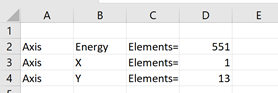

- Loading data into usable datatypes
  
  The first step is load the workbook from the local desktop onto Jupyter notebook. I am doing this using the `load_workbook` function from `openpyxl`

In [3]:
wb = load_workbook(filename='PdNiAuCMo XPS 300K.xlsx') 

Next, I am reading all the worksheets and appending them to a single list. On opening the data file, I know that I want the data from the 5th worksheet onwards, hence not including the 1st four worksheets

In [4]:
ws=[]
for i in range(len(wb.worksheets)):
    ws.append(wb.worksheets[i]) 

#Actual useful data starts from worksheet 5
ws = ws[4:]   #not including the first four, since they contain other information

Loading data into numpy arrays by iterating over all sheets

In [5]:
nenergy = ws[0]['D2'].value #number of elements of energy

In [6]:
#using iter_rows to append the list by defining range of rows and columns
BE= np.array(list(ws[0].iter_rows(min_row=15, max_row= 15 + nenergy - 1,
                                min_col=1, max_col=1,
                                values_only=True))).squeeze()

In [7]:
#Making an array of X points

x=[]
for i in range(len(ws)):
    x.append(np.array(list(ws[i].iter_rows(min_row=10, max_row=10,
                               min_col=2, max_col=2 ,
                               values_only=True))))
x = np.array(x)
x = x.reshape(13,1)  
x = np.repeat(x,13)   #Making an array for 169 points

In [8]:
#Making an array of Y points

y=[]
for i in range(len(ws)):
    y.append(np.array(list(ws[0].iter_rows(min_row=12, max_row=12,
                               min_col=3, max_col=3 + 13 - 1,
                               values_only=True))))
    
y = np.array(y)
y = y.reshape(13*13,1) #Reshaping to making the dimensions same as x

In [9]:
counts = []
for i in range (len(ws)):
    counts.append(np.array(list(ws[i].iter_rows(min_row=15, max_row= 15 + nenergy - 1,
                                min_col=3, max_col=3+13-1,
                                values_only=True))))

counts = np.array(counts)

Thus, the four arrays above are as follows:

1. X is an array for the X positions of the grid, hence has 169 X points
2. Y is an array for the Y positions of the grid, hence has 169 Y points
3. BE is a 1D array for 551 Binding Energies
2. Counts is a 3D array which gives an array for all Binding Energies for a given X,Y co-ordinate

 - Implementation of visualization  techniques
   
   Here is the preliminary visualization of the data:

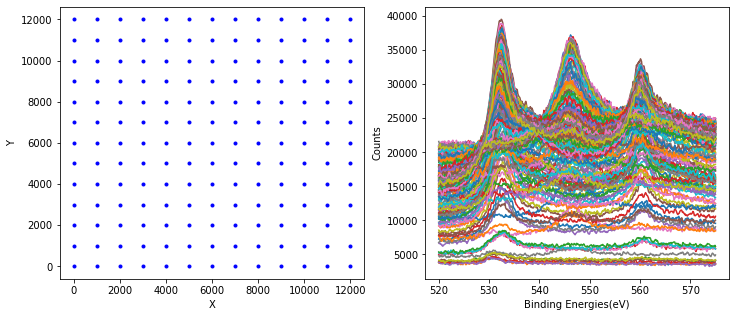

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,5))
ax1.plot(x, y, 'b.')

for i in range(13):
    for j in range(13):
        ax2.plot(BE,counts[i,:,j])
ax1.set_xlabel('X',fontsize=10)
ax1.set_ylabel('Y')
ax2.set_xlabel('Binding Energies(eV)')
ax2.set_ylabel('Counts')
plt.show()

fig.savefig('file')

In order to get interactive plots and save them offline, I am using [plotly](https://plotly.com/python/). This is a plotting library. With the help of plotly, the interactive plots can be hovered over to see the data points, taken screenshots of, used to compare data and even make interactive widgets such as dropdowns.

#### <u>Results</u>
I have used the figure widget form plotly which makes interactive plots. These can be scatter plots, line plots, bar graphs or others. I have made 3 plotly interactive plots:
   1. Visualize and save the X-Y grid
   2. Visualize and save the spectrum
   3. Manually input the (X,Y) point and view it's corresponding spectrum
   
The first two plots can be saved by using the object `write_html`. This saves the plot offline as an html file. The html file can be opened in any browser and viewed, which doesn't require a Jupyter notebook or any python knowledge.

The figure 1 below shows the X-Y grid of the alloy

In [11]:
fig1 = go.Figure(data=go.Scatter(x=x,y=y[:,0],mode='markers',marker=dict(size=10,color='crimson'))) #making a figure widget
fig1.update_layout(title='Figure 1: X-Y grid',xaxis_title='X',yaxis_title='Y')  #Updating the plot with details
fig1.write_html('Figure1.html')  #Saving the figure as an html file
fig1.show()

In the figure 2, I am plotting the XPS spectrum for all points on the X-Y grid. Here I have used the argument `visible='legendonly'`, since seeing a bunch of all spectra doesn't really give much information. With this argument, no trace will be plotted on running the code cell, one can click on the legend to see the particular trace. This interactive plot is now saved as figure 2. Hence anyone wanting to view a specific spectrum, has to just open the html file in any browser and click on the particular trace! 

If we still wish to view all the spectra together and then remove the spectrum one by one, it can be done as follows:
- Do not include the `visible='legendonly'` argument
- Click on the trace in the legend to erase it from the plot

In [11]:
fig2 = go.Figure()
#Looping on 13 unique points of x and y
for i in range(13):
    for j in range(13):
        fig2.add_trace(go.Scatter(x=BE,y=counts[i,:,j],visible = 'legendonly', name=f'({x[13*i+j]:.0f},{y[13*i+j,0]})',mode='lines',opacity=1))
    
fig2.update_layout(title='Figure 2: XPS Spectrum',xaxis_title='BE',yaxis_title='Counts')   
fig2.write_html('Figure2.html')
fig2.show()

With this saved HTML file, the user can do the following:

1. View all the spectra at one time
2. Hover over to see the exact co-ordinates
3. By clicking on the legend, one can view selected spectrum
4. By clicking on the 'Compare' option on the right top corner, one can compare the selected spectra

Figure 3 allows the user to input the X and Y co-ordinate to see the specific spectrum. For this, I have used the `Dropdown` widget from `plotly`. The `HBox` and `VBox` are widget objects to define the layout of the plots. The function `func` is used to update the plot according to the selected (X,Y) point from the dropdown. It updates using `batch_update()`. Here I only update the counts, which is the y-data for the plot. `observe` is used to call the function which makes the necessary changes.

In [12]:
#define dorpdown items and label
x_data = widgets.Dropdown(options=[f'{x[13*i+j]:.0f}' for i,j in zip(range(13),range(13))],description='X') 
y_data = widgets.Dropdown(options=[f'{y[13*i+j,0]:.0f}' for i,j in zip(range(13),range(13))],description='Y')

#layout for dropdowns
container = widgets.HBox(children=[x_data,y_data])

#trace for scatter plot
trace1 = go.Scatter(x=BE,y=counts[0,:,0],mode='lines')

#Figure widget to show the scatter plot
fig3 = go.FigureWidget(data=[trace1])

#function to update the plot
def func(change):
    with fig3.batch_update():
        fig3.data[0].y = counts[int(int(x_data.value)/1000),:,int(int(y_data.value)/1000)]

#function call
x_data.observe(func,names='value')
y_data.observe(func,names='value')

fig3.update_layout(title='Figure 3: XPS Spectrum for selected X-Y point',xaxis_title='Binding Energy(eV)',yaxis_title='Counts') 
widgets.VBox([container,fig3])


#### <u>Discussion</u>

This project sucessfully visualizes the data recieved from the XPS experiment. Good visualization of such data is important before one moves to the next step which is analysis. Thus, using this python script and making some tiny changes specific to the data, one can easily visualize any given XPS data form an excel sheet.

#### <u>Extension</u>

After visualization comes analysis. One way of analysis could be starting with Principal Component Analysis. I plan to continue work on this topic by chosing PCA as one of my extension.

PCA is mainly used to reduce the dimentionality of the data. It smoothens the curves by removing noise. It is used to compare the common features among the different curves. This smoothened data can then be used for peak fitting. I am reading more and understanding PCA from here: https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

To begin with, `sklearn` provides useful functions to carry out PCA. Here, PCA will be implemented to recude the 169 dimension of the counts. I have started by calculating the number of components required and then plotting the principal components vs. Binding energy. 

In [13]:
#importing libraries

import sklearn as sk
from sklearn.decomposition import PCA

In [14]:
#Reshaping BE
T=BE.reshape(551,1)

#Converting counts from a 3D array into 2D array
L = []
for i in range (13):
    for j in range (13):
        L.append(counts[i,:,j])
        
z = np.array(L)
g = z.T

#Making a final dataset
Load_data=np.concatenate((T,g),axis=1)

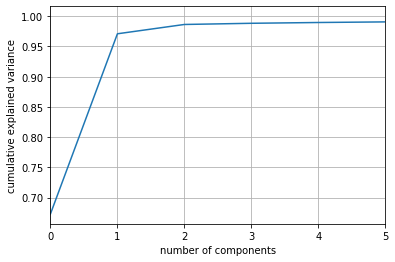

In [15]:
# Apply min-max scaling
scaler= sk.preprocessing.MinMaxScaler()
dataset_scaled = scaler.fit_transform(g)

#Checking for number of principal components required by fitting the counts data
pca = PCA().fit(dataset_scaled)
plt.xlim([0,5])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()

The above graph shows how the cumulative variance increases with increase in number of comonents. This graph tells us that with 2 principal components the variance reaches very close to 100%. Hence I am chosing to express my counts in the form of 2 principal components.

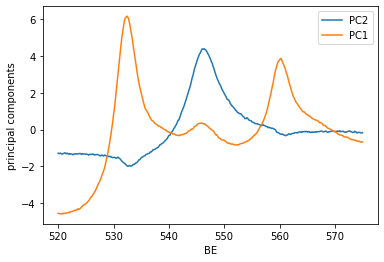

In [16]:
# Do PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dataset_scaled)

plt.plot(BE,pca_result[:,1],BE,pca_result[:,0])
plt.xlabel('BE')
plt.ylabel('principal components')
plt.legend(['PC2','PC1'])
plt.show()

The above graph shows that our data of counts can be fitted into 3 peaks with 2 principal components by reducing noise. These fitted peaks are used to figure what element would be present at that position on the catalyst surface. 

This script for PCA was to give a flavor of what analysis for this data would look like. Hence this project can further be extended by carrying out fitting or PCA for analysis of this data.

---

#### <u>Acknowledgements</u>

I thank Zhitao Guo, a 4th year PhD student from prof. Gellman's research group, to provide me with the dataset and objectives for this project. I thank him for all the help and guidance.

Most importantly I thank Prof. Kitchin for not only teaching data science so well, but also adapting to the challenging conditions due to COVID-19, and still making this course interesting and worth learning. 

#### <u>References</u>

1. X-ray photoelectron spectroscopy, Wikipedia https://en.wikipedia.org/wiki/X-ray_photoelectron_spectroscopy
2. Numpy python library https://docs.scipy.org/doc/numpy/reference/
3. https://openpyxl.readthedocs.io/en/stable/index.html
4. Plotly python library https://plotly.com/python/